In [21]:
#30/5/24 For the implementaion of Support Vector Machine Prediction in Python for Toxicity Prediction

import pandas as pd
import numpy as np

#Data import
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Endocrine/Morganfp.csv')
#Creating test/train splits
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=82)
#Converts Toxicity Values to a list
temp = trainset['Toxicity_Value']#.to_list
ytrain = []
for val in temp:
    ytrain.append(val)
ytest = []
temp = testset['Toxicity_Value']#.to_list
for val in temp:
    ytest.append(val)
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:]
xtest = testset.iloc[:, 2:]

In [22]:
from sklearn import svm
SVM = svm.SVC(C=1, kernel='sigmoid', gamma='scale', 
              coef0=0.4, shrinking=True, probability=False, 
              tol=0.001, cache_size=200, class_weight=None, 
              verbose=False, max_iter=-1, decision_function_shape='ovr', 
              break_ties=False, random_state=81)
model= SVM.fit(xtrain, ytrain)
preds = model.predict(xtest)

In [ ]:
#Metric curve creation (Recycled from autoencoder doc)
metriclist = []

for deg in np.arange(0, 1):
    SVM = svm.SVC(C=1, kernel='sigmoid', gamma='scale', 
              coef0=0.4, shrinking=False, probability=False, 
              tol=0.001, cache_size=200, class_weight=None, 
              verbose=False, max_iter=-1, decision_function_shape='ovr', 
              break_ties=False, random_state=81)
    model= SVM.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    
    metriclist.append(metriccalc(preds, ytest))

import matplotlib.pyplot as plt
plt.plot(metriclist)

In [ ]:
#Parameter Tuning (non poly)
kernels = ['linear', 'rbf', 'sigmoid']
degrees = range(1,5)
gammas = ['scale', 'auto']
maxval = 0
for kernel in kernels:
    for gamma in gammas:        
        SVM = svm.SVC(C=1, kernel=kernel, gamma=gamma, 
                  coef0=0.4, shrinking=False, probability=False, 
                  tol=0.001, cache_size=200, class_weight=None, 
                  verbose=False, max_iter=-1, decision_function_shape='ovr', 
                  break_ties=False, random_state=81)
        model= SVM.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        newval = metriccalc(preds, ytest)
        curmetrics = [kernel, gamma]
         if newval > maxval:
            maxval = newval
            bestmetrics = curmetrics

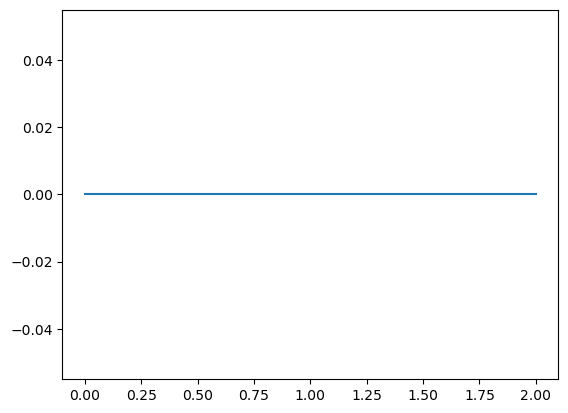

In [24]:
#Parameter Tuning (poly)
degrees = range(1,4)
gammas = ['auto']
maxval = 0
toplot = []
for degree in degrees:
    for gamma in gammas:        
        SVM = svm.SVC(C=1, kernel='poly', gamma='auto', degree = degree,
                  coef0=0.4, shrinking=False, probability=False, 
                  tol=0.001, cache_size=200, class_weight=None, 
                  verbose=False, max_iter=-1, decision_function_shape='ovr', 
                  break_ties=False, random_state=81)
        model= SVM.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        newval = metriccalc(preds, ytest)
        toplot.append(newval)
        if newval > maxval:
            maxval = newval
            bestmodel = model
            bestdeg = degree

import matplotlib.pyplot as plt
plt.plot(toplot)

In [6]:
newval

1.0

In [23]:
correctcount = 0
fpcount = 0
tpcount = 0
tncount = 0
fncount = 0
testpos = 0
testneg = 0

iterations = 0
for value in preds:
    testscore = ytest[iterations]
    if value == 1:
        if testscore != 0:
            testpos = testpos + 1
            correctcount = correctcount + 1
            tpcount = tpcount + 1
        else:
            fpcount = fpcount + 1
            testneg = testneg + 1
    else:
        if testscore != 0:
            testpos = testpos + 1
            fncount = fncount + 1
        else:
            testneg = testneg + 1
            correctcount = correctcount + 1
            tncount = tncount + 1

    iterations = iterations + 1


print('positives in data', testpos)
print('negatives in data', testneg, '\n')

print('fn count =', fncount)
print('tn count =', tncount)

print('tp count =', tpcount)
print('fp count =', fpcount, '\n')

netfn = fncount / (fncount + tncount)
nettn = tncount / (fncount + tncount)
netacc = correctcount / (fpcount + fncount + tpcount + tncount)
posacc = tpcount / testpos
negacc = tncount / testneg
netfp = fpcount / (fpcount + tpcount)
nettp = tpcount / (tpcount + fpcount)

print('net accuracy =', netacc)
print('positive accuracy =', posacc)
print('negative accuracy =', negacc, '\n')

fpr = fpcount / (fpcount + tncount)
tpr = tpcount / (tpcount + fncount)

print('fpr =', fpr)
print('tpr =', tpr, '\n')

f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)
print('f1 score =',f1)

tp = tpcount
fp = fpcount
tn = tncount
fn = fncount

mcc = ((tp * tn) - (fp * fn)) / math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))

print('mcc =',mcc)

temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp

print('cohen Kappa =',kapp)

positives in data 1075
negatives in data 1574 

fn count = 664
tn count = 1045
tp count = 411
fp count = 529 

net accuracy = 0.5496413741034353
positive accuracy = 0.38232558139534883
negative accuracy = 0.6639135959339263 

fpr = 0.3360864040660737
tpr = 0.38232558139534883 

f1 score = 0.4079404466501241
mcc = 0.047454973656846096
cohen Kappa = 0.04717832446668184


In [7]:
#function to calculate various metricsm, output changes as needed
import math
def metriccalc(preds, ytrain):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0

    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1

    #netfn = fncount / (fncount + tncount)
    #nettn = tncount / (fncount + tncount)
    #netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    #posacc = tpcount / testpos
    #negacc = tncount / testneg
    #netfp = fpcount / (fpcount + tpcount)
    #nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    return mcc

